In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [45]:
class SOM:
    def __init__(self, out_layer, data_set, label_set, iteration, task='both', verbose=False):
        """
        :param out_layer: 输出层神经元的形状
        :param data_set: 数据集
        :param label_set:标签集
        :param iteration: 迭代次数
        :param task: 任务，classify(分类)和cluster(聚类)
        :param verbose: 若为True，则显示过程，默认为False
        weight: 随机权值矩阵
        neuron_num: 输出神经元数量，具体值为out_layer的shape行列乘积
        out_neuron: 输出层神经元，用来记录每个输出层神经元包含的输入神经元
        in_neuron: 输入神经元，用来记录每个输入神经元映射到的输出神经元
        """
        self.out_layer = out_layer
        self.data_set = data_set
        self.label_set = label_set
        self.iteration = iteration
        self.task = task
        self.verbose = verbose
        self.neuron_num = out_layer[0] * out_layer[1]
        self.out_neuron = [[] for _ in range(self.neuron_num)]
        self.weight = np.zeros((self.neuron_num, len(data_set[0])))
        self.trained = False

    def Geteta(self, n, distance):
        """
        :param n: 迭代次数
        :param distance: 距离
        :return: 返回学习率
        """
        return np.power(np.e, -distance) / (n+3)

    def Getneighbour(self, neuron, n):
        """
        :param neuron: 获胜神经元
        :param n: 迭代次数
        :return: 需要更新权值的输出神经元及其与BMU的欧式距离
        """
        update_lis=[]
        coord = (neuron // self.out_layer[0], neuron % self.out_layer[0])
        for i in range(self.neuron_num):
            coord_temp = (i // self.out_layer[0], i % self.out_layer[0])
            distance=(coord[0]-coord_temp[0])**2+(coord[1]-coord_temp[1])**2
            if distance<n:
                update_lis.append([i,distance])
        return update_lis

    def iterate(self, n):
        """
        :param n: 迭代次数
        """
        def Getdistance(neu1, neu2):
            """
            :param neu1: 第一个神经元
            :param neu2: 第二个神经元
            :return: 两个神经元之间的距离
            """
            dx = abs(neu1 - neu2) // self.out_layer[0]
            dy = abs(neu1 - neu2) // self.out_layer[1]
            d = np.array([dx, dy])
            distance = np.linalg.norm(d)
            return distance
        for i in range(len(self.data_set)):
            data = self.data_set[i]
            for j in range(len(self.weight)):
                d = data - self.weight[j]
                distance = np.linalg.norm(d)
                if j == 0 or minDistance > distance:
                    minDistance = distance
                    win = j
            for k,distance in self.Getneighbour(win, n):
                eta = self.Geteta(n, distance)
                self.weight[k] = self.weight[k] * (1 - eta) + eta * data
                #self.out_neuron[k].append(i)
            self.out_neuron[win].append(i)
    
    def Getclass(self,neuron):
        """
        :param neuron:输出神经元
        """
        cla=[0,0]
        for i in self.out_neuron[neuron]:
            if self.label_set[i] == 1:
                cla[0]=cla[0]+1
            else:
                cla[1]=cla[1]+1
        if cla==[0,0]:
            return 0
        return 'red' if cla[1] > cla[0] else 'blue'

    def train(self):
        self.trained = True
        self.weight = np.random.rand(self.neuron_num, len(self.data_set[0]))
        for i in range(self.iteration):
            self.out_neuron = [[] for _ in range(self.neuron_num)]
            self.iterate(i + 1)
            if self.verbose == True:
                plt.scatter(self.weight[:, 0], self.weight[:, 1], c='b')
                plt.show()
        print(self.out_neuron)
        if self.task == 'classify':
            plt.title('classify')
            for neu_index in range(self.neuron_num):
                color = self.Getclass(neu_index)
                if color != 0:
                    plt.scatter(self.weight[neu_index, 0], self.weight[neu_index, 1], c=color)
            plt.scatter(self.data_set[8:, 0], self.data_set[8:, 1], marker='*')
            plt.scatter(self.data_set[:8, 0], self.data_set[:8, 1], marker='.')
            plt.show()
        if self.task == 'cluster':
            plt.title('cluster')
            plt.scatter(self.data_set[:, 0], self.data_set[:, 1], marker='*')
            for neu_index in range(self.neuron_num):
                if self.out_neuron[neu_index] != []:
                    plt.scatter(self.weight[neu_index,0],self.weight[neu_index,1])
                    for d_index in self.out_neuron[neu_index]:
                        x=[self.weight[neu_index,0],self.data_set[d_index,0]]
                        y=[self.weight[neu_index,1],self.data_set[d_index,1]]
                        plt.plot(x,y,c='b',lw=0.1)
            plt.show()
        if self.task == 'both':
            plt.title('classify')
            for neu_index in range(self.neuron_num):
                    color = self.Getclass(neu_index)
                    if color != 0:
                        plt.scatter(self.weight[neu_index, 0], self.weight[neu_index, 1], c=color)
            plt.scatter(self.data_set[8:, 0], self.data_set[8:, 1], marker='*')
            plt.scatter(self.data_set[:8, 0], self.data_set[:8, 1], marker='.')
            plt.show()
            plt.title('cluster')
            plt.scatter(self.data_set[:, 0], self.data_set[:, 1], marker='*')    
            for neu_index in range(self.neuron_num):
                if self.out_neuron[neu_index] != []:
                    plt.scatter(self.weight[neu_index,0],self.weight[neu_index,1])
                    for d_index in self.out_neuron[neu_index]:
                        x=[self.weight[neu_index,0],self.data_set[d_index,0]]
                        y=[self.weight[neu_index,1],self.data_set[d_index,1]]
                        plt.plot(x,y,c='b',lw=0.1)
            plt.show()
            
    def predict(self, n=3):
        if self.trained == True:
            index=[]
            for i in range(n):
                index.append(random.randint(0,len(self.data_set)))
            for i in index:
                data = self.data_set[i]
                Mindistance = 100
                for neu_index in range(self.neuron_num):
                    if self.out_neuron[neu_index] != []:
                        dx = self.weight[neu_index]-data[0]
                        dy = self.weight[neu_index]-data[1]
                        d = np.array([dx, dy])
                        distance = np.linalg.norm(d)
                        if distance < Mindistance:
                            Mindistance = distance
                            out_neuron = neu_index
                cla = self.Getclass(out_neuron)
                print(data, 'is in neuron', out_neuron, ', it\'s class is', cla)
        else:
            print('haven\'t trained yet\nuse object.train\(\)')

In [43]:
with open("data.txt", "r") as f:
    datas = f.read().split(",")
    label_set = [int(datas[i]) for i in range(0,len(datas),3)]
    data_set = [[float(datas[i + 1]), float(datas[i + 2]), ] for i in range(0, len(datas), 3)]
    data_set = np.array(data_set)
    f.close()

[[], [14], [6, 7], [8, 12, 13, 15], [], [10, 11], [5], [2, 3], [], [], [], [], [4], [1], [0], [9]]


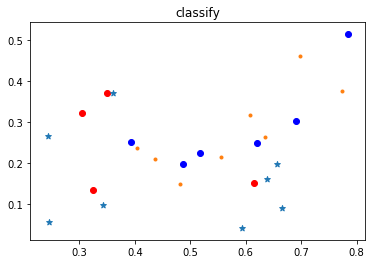

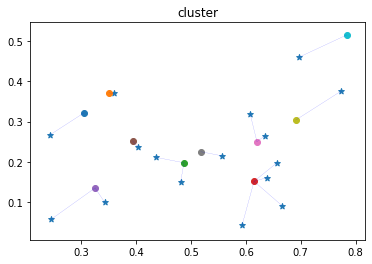

[0.774 0.376] is in neuron 14 , it's class is blue
[0.403 0.237] is in neuron 15 , it's class is red
[0.245 0.057] is in neuron 5 , it's class is red
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs


In [48]:
som = SOM((4, 4), data_set, label_set, 5,task='both', verbose=False)
som.train()
som.predict()
%time